Deep Learning

Homework 2 📚 💻 : Train and test a fullyconnected neural network for entire MNIST handwritten digit dataset.

Himani Parikh - 1322085

Framework - Tensorflow

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

***Load the minst dataset***


---



In [2]:
minst_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)= minst_dataset.load_data()

print(x_train.shape , y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

***Data Pre-Processing : Normalize(Min-Max scaling)***


---



In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

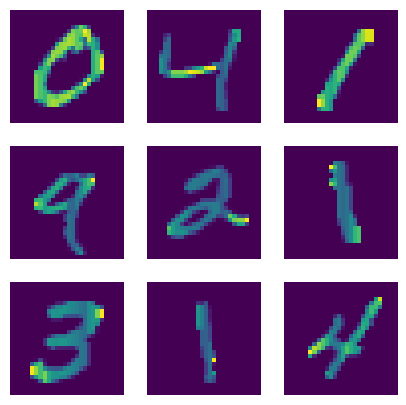

In [5]:
plt.figure(figsize=(5,5))
for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.axis('off')
  plt.imshow(x_train[i].squeeze())

***Create Fully connected with 2 hidden layers network model***


---



In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(200, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(50, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 50)                10050     
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 167560 (654.53 KB)
Trainable params: 167560 (654.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***Training Model***


---



In [9]:
model.fit(x_train, y_train, batch_size = 128, epochs=10)
print("The model has successfully trained")

model.save('sample.model')

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.5484 - accuracy: 0.8432
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2205 - accuracy: 0.9356
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1601 - accuracy: 0.9528
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1255 - accuracy: 0.9629
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1028 - accuracy: 0.9696
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0855 - accuracy: 0.9742
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0723 - accuracy: 0.9785
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0621 - accuracy: 0.9816
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0536 - accuracy: 0.9843
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0452 - accuracy: 0.98

***Model Evaluation***

---



In [17]:
s_model = tf.keras.models.load_model('sample.model')
loss, accuracy = s_model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', np.round((accuracy)*100, 2))

313/313 [==============================] - 2s 5ms/step - loss: 0.0817 - accuracy: 0.9740
Test loss: 0.0816742479801178
Test accuracy: 97.4


***Testing Model***


---



In [11]:
y_predicted = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


7


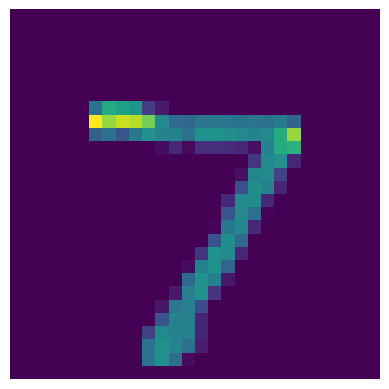

In [24]:
plt.imshow(x_test[0].squeeze())
plt.axis('off')
print(np.argmax(y_predicted[0]))

3


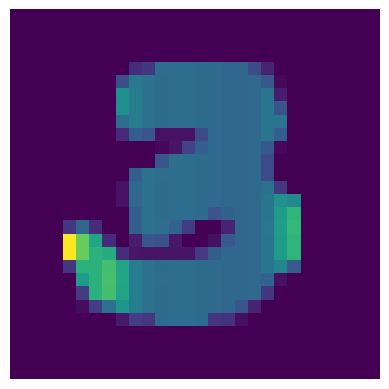

In [23]:
plt.imshow(x_test[200].squeeze())
plt.axis('off')
print(np.argmax(y_predicted[200]))